# Predicting United States County Poverty Rates Through The Microsoft Capstone Project

The goal of this project is to predict accurately the poverty rate of United Sates counties. Predicting the value of a quantitative variable is a regression problem. We will follow a CRISP-DM Approach in order to tackle this regression problem:

* Understand and explore the data
* Clean and transform the data
* Create a model
* Evaluate the model
* Deploying the model is not applicable to this project; or we could say that the creation of this report or the presentation of our findings counts as the deployment of this model.

This is a regression problem with metric RMSE.
* how to deal recognise two rows of the same county?
* How do we recognize missing values?
* What are the range values of the quantitative variables?

Soo many thing to do and tryout
* 1. apply statistical transformations with scatter plot matrix
* 2. analyze outliers
* 3. apply feature selection

* apply feature engineering
* 4. try different scalers
* try GLM (ridge regression / lassoregression) / Adaboost regression
* 5. Analyze residuals (look video analysis residuals)
* Test for significance
* confidence intervals
* complete sklearn pipeline

* use different cv? number of splits? test size?
* how does best estimator and training works?

In [2]:
import re
import bs4
import time
import plyfile
import html5lib
import multiprocessing

import numpy as np
import pandas as pd

from scipy import misc
import scipy.io.wavfile as wavfile

import scipy
from math import sqrt
from scipy import stats
from pprint import pprint
from sklearn import tree
from sklearn.svm import SVC
from sklearn import manifold
from tempfile import mkdtemp
from matplotlib import cm as cm


import sklearn.metrics as metrics
from pandas.plotting import scatter_matrix
from scipy.stats import randint as sp_randint
from sklearn.pipeline import TransformerMixin
from sklearn.metrics.scorer import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, Normalizer, RobustScaler, StandardScaler
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict, KFold, ShuffleSplit

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates, andrews_curves

%matplotlib inline
matplotlib.style.use('ggplot')

# Predicting Poverty Rates
The goal of our project is to effectively predict poverty rates for american counties. In order to do that we have identified the features or variables that hold the most predicting value and build a regression model around that.

## Data Exploration
We will explore the prediction value of the categorical and quantitative variables. In this process we will create new features. Lastly we explore the effect of outliers on the regression model.

In [3]:
poverty_train = pd.read_csv('./Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Training_values.csv')

In [4]:
poverty_train.shape

(3198, 34)

In [5]:
poverty_train.dtypes

row_id                                                int64
area__rucc                                           object
area__urban_influence                                object
econ__economic_typology                              object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school

In [6]:
pd.set_option('display.max_columns', None)
poverty_train.describe()

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician
count,3198.000000,3198.000000,3198.00000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3196.000000,2734.000000,3196.000000,3016.000000,2220.000000,3196.000000,3170.000000,1231.000000,2781.000000,2954.000000,2968.000000
mean,3156.692620,0.467071,0.05961,0.217534,0.085920,0.498781,0.227763,0.170137,0.090233,0.091117,0.770207,0.024659,0.013304,0.148794,0.350300,0.301366,0.199540,11.676986,10.301126,0.307599,0.213519,0.109287,0.083534,0.164832,0.277309,11.626498,5.950747,21.116077,3431.442789,2551.349730
std,1823.959278,0.074541,0.02285,0.067372,0.040005,0.024251,0.034291,0.043594,0.142707,0.147104,0.207903,0.084634,0.025366,0.068255,0.070534,0.052498,0.089158,2.739516,2.786143,0.043404,0.063090,0.023197,0.022382,0.050232,0.052947,1.544928,5.063374,10.516984,2569.444414,2100.475931
min,0.000000,0.217000,0.00800,0.046000,0.009000,0.294000,0.098000,0.043000,0.000000,0.000000,0.060000,0.000000,0.000000,0.016129,0.072821,0.112821,0.013986,4.000000,0.000000,0.140000,0.050000,0.033000,0.025000,0.038000,0.097000,7.000000,-0.390000,3.090000,339.000000,189.000000
25%,1561.750000,0.420000,0.04400,0.166000,0.057000,0.493000,0.207000,0.142000,0.019000,0.006000,0.648000,0.002000,0.003000,0.097468,0.305915,0.265362,0.138840,10.000000,8.000000,0.284000,0.171000,0.094000,0.068000,0.129000,0.243000,10.000000,2.660000,13.460000,1812.250000,1419.000000
50%,3198.500000,0.467000,0.05700,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,0.854000,0.007000,0.007000,0.133501,0.355701,0.301595,0.177247,11.000000,10.000000,0.309000,0.211000,0.109000,0.080000,0.164000,0.280000,12.000000,4.840000,19.630000,2690.000000,1999.000000
75%,4723.750000,0.514000,0.07100,0.262000,0.105000,0.512000,0.245250,0.194000,0.088000,0.096250,0.936000,0.014000,0.013000,0.195171,0.399197,0.335972,0.233258,13.000000,12.000000,0.334000,0.249750,0.124000,0.095000,0.196000,0.313000,13.000000,7.825000,26.470000,4089.750000,2859.000000
max,6277.000000,1.000000,0.24000,0.495000,0.285000,0.576000,0.417000,0.355000,0.945000,0.855000,0.998000,0.852000,0.346000,0.466867,0.551689,0.474216,0.794872,29.000000,27.000000,0.484000,0.526000,0.197000,0.232000,0.358000,0.443000,15.000000,51.490000,110.450000,28129.000000,23400.000000


In [7]:
poverty_labels = pd.read_csv('Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Training_labels.csv')
poverty_labels.head()

,row_id,poverty_rate
0,0,22.6
1,2,17.3
2,4,24.4
3,5,16.4
4,8,17.4


In [8]:
poverty_labels.shape

(3198, 2)

In [9]:
poverty_labels.dtypes

row_id            int64
poverty_rate    float64
dtype: object

In [10]:
poverty_labels.describe()

,row_id,poverty_rate
count,3198.000000,3198.000000
mean,3156.692620,16.817136
std,1823.959278,6.697969
min,0.000000,2.500000
25%,1561.750000,12.000000
50%,3198.500000,15.800000
75%,4723.750000,20.300000
max,6277.000000,47.400000


poverty_rate is right skewed of positively skewed.

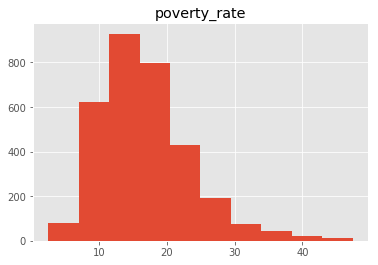

In [11]:
poverty_lb_raw = poverty_labels
hist_pov_lb = poverty_lb_raw.hist(column='poverty_rate')

Create one dataset by merging poverty_train and povert_labels. This is necessary to do a good statistical exploration of the data.

In [12]:
poverty = pd.merge(poverty_train, poverty_labels, on='row_id')
poverty.shape

(3198, 35)

### Data Exploration and Visualization of Categorical Variables
Here we explore the prediction value of the categorical variables 'econ__economic_typology', 'area__urban_influence', 'area__rucc' and 'yr'. We use mostly boxplots and one way analysis of variance (ANOVA).

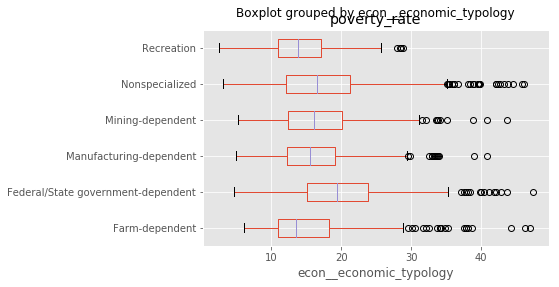

In [13]:
bpd_eet = poverty.boxplot(column='poverty_rate', by='econ__economic_typology', vert=False, return_type='dict')

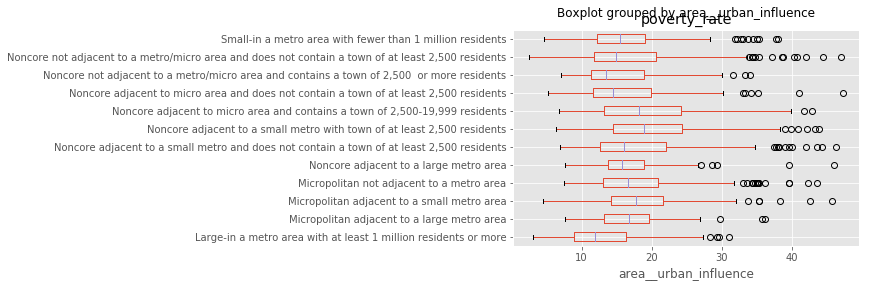

In [14]:
bpd_aui = poverty.boxplot(column='poverty_rate', by='area__urban_influence', vert=False, return_type='dict')

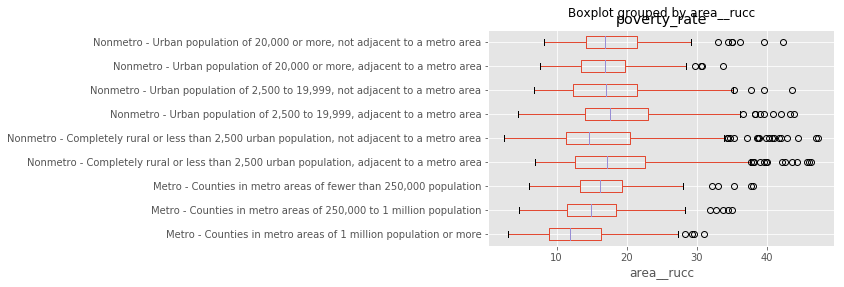

In [15]:
bpd_rucc = poverty.boxplot(column='poverty_rate', by='area__rucc', vert=False, return_type='dict')

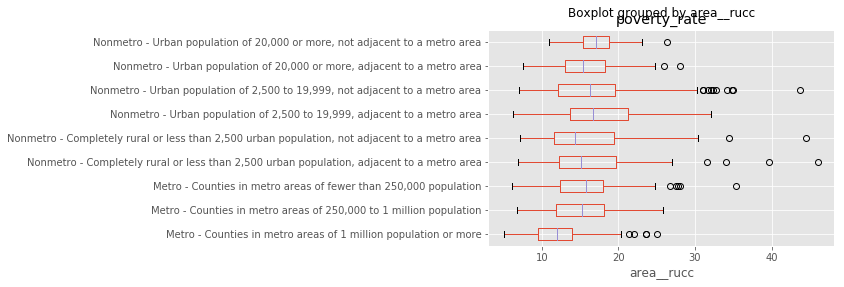

In [16]:
old_counties = poverty.demo__pct_aged_65_years_and_older > 0.167000
old_poor = poverty.loc[old_counties,:]
bpd_old = old_poor.boxplot(column='poverty_rate', by='area__rucc', vert=False, return_type='dict')

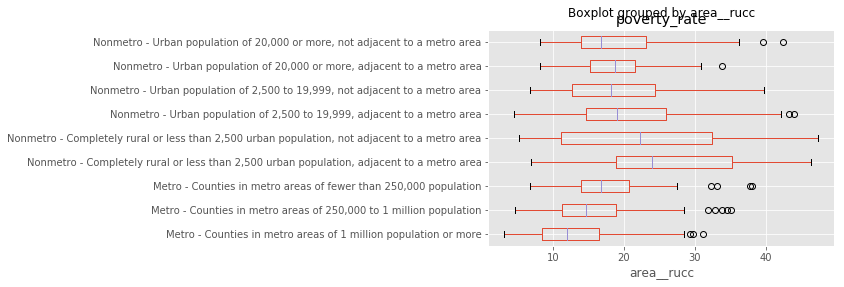

In [17]:
young_counties = poverty.demo__pct_aged_65_years_and_older < 0.167000
young_poor = poverty.loc[young_counties,:]
bpd_young = young_poor.boxplot(column='poverty_rate', by='area__rucc', vert=False, return_type='dict')

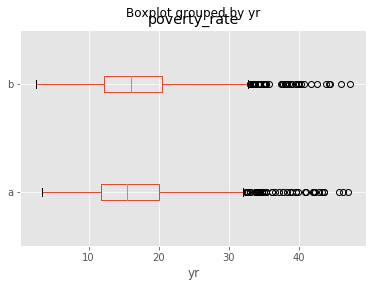

In [18]:
bpd_yr = poverty.boxplot(column='poverty_rate', by='yr', vert=False)

The categorical variable 'yr' does not hold any value to differentiate poverty rates. We will therefore drop it at the cleaning stage.

### Creation and Visualization New Categorical Variables

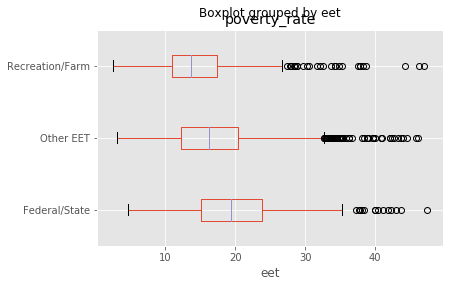

In [19]:
poverty.loc[poverty.econ__economic_typology == 'Recreation','eet'] = 'Recreation/Farm'
poverty.loc[poverty.econ__economic_typology == 'Nonspecialized','eet'] = 'Other EET'
poverty.loc[poverty.econ__economic_typology == 'Mining-dependent','eet'] = 'Other EET'
poverty.loc[poverty.econ__economic_typology == 'Manufacturing-dependent','eet'] = 'Other EET'
poverty.loc[poverty.econ__economic_typology == 'Federal/State government-dependent','eet'] = 'Federal/State'
poverty.loc[poverty.econ__economic_typology == 'Farm-dependent','eet'] = 'Recreation/Farm'
bpd_n_eet = poverty.boxplot(column='poverty_rate', by='eet', vert=False)

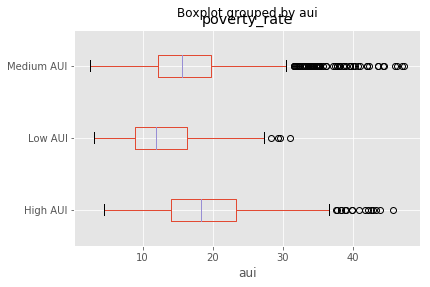

In [20]:
poverty.loc[poverty.area__urban_influence == 'Noncore adjacent to a large metro area','aui'] = 'Medium AUI'
poverty.loc[poverty.area__urban_influence == 'Micropolitan adjacent to a large metro area','aui'] = 'Medium AUI'
poverty.loc[poverty.area__urban_influence == 'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents','aui'] ='High AUI'
poverty.loc[poverty.area__urban_influence == 'Large-in a metro area with at least 1 million residents or more','aui'] = 'Low AUI'
poverty.loc[poverty.area__urban_influence == 'Micropolitan not adjacent to a metro area','aui'] = 'Medium AUI'
poverty.loc[poverty.area__urban_influence == 'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents','aui'] = 'Medium AUI'
poverty.loc[poverty.area__urban_influence == 'Noncore adjacent to a small metro with town of at least 2,500 residents','aui'] = 'High AUI'
poverty.loc[poverty.area__urban_influence == 'Small-in a metro area with fewer than 1 million residents','aui'] = 'Medium AUI'
poverty.loc[poverty.area__urban_influence == 'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents','aui'] = 'Medium AUI'
poverty.loc[poverty.area__urban_influence == 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents','aui'] = 'Medium AUI'
poverty.loc[poverty.area__urban_influence == 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents','aui'] = 'Medium AUI'
poverty.loc[poverty.area__urban_influence == 'Micropolitan adjacent to a small metro area','aui'] = 'High AUI'
bpd_n_aui = poverty.boxplot(column='poverty_rate', by='aui', vert=False)

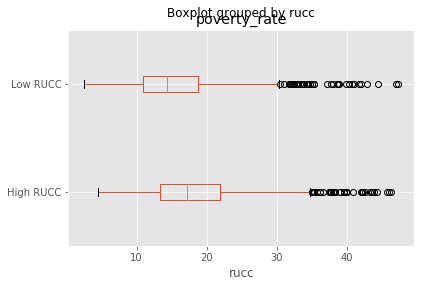

In [21]:
poverty.loc[poverty.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area','rucc'] = 'High RUCC'
poverty.loc[poverty.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area','rucc'] ='High RUCC'
poverty.loc[poverty.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area','rucc'] = 'Low RUCC'
poverty.loc[poverty.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area','rucc'] ='High RUCC'
poverty.loc[poverty.area__rucc == 'Metro - Counties in metro areas of 1 million population or more','rucc'] = 'Low RUCC'
poverty.loc[poverty.area__rucc == 'Metro - Counties in metro areas of 250,000 to 1 million population','rucc'] = 'Low RUCC'
poverty.loc[poverty.area__rucc == 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area','rucc'] = 'High RUCC'
poverty.loc[poverty.area__rucc == 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area','rucc'] = 'High RUCC'
poverty.loc[poverty.area__rucc == 'Metro - Counties in metro areas of fewer than 250,000 population','rucc'] = 'Low RUCC'
bpd_n_rucc = poverty.boxplot(column='poverty_rate', by='rucc', vert=False)

The categorical variable age does not hold any value by itself.

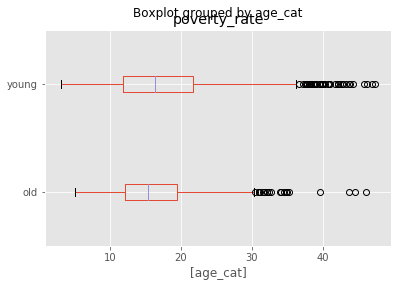

In [22]:
poverty.loc[young_counties,'age_cat'] = 'young'
poverty.loc[old_counties,'age_cat'] = 'old'
bpd_n_age = poverty.boxplot(column='poverty_rate', by=['age_cat'], vert=False)

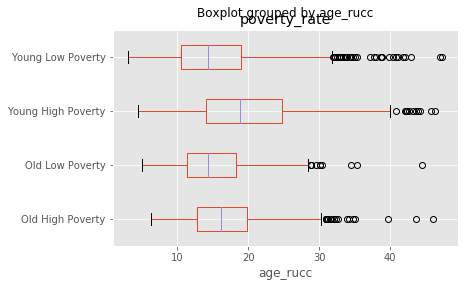

In [23]:
rucc_low = poverty.rucc == 'Low RUCC'
rucc_high = poverty.rucc == 'High RUCC'
poverty.loc[young_counties & rucc_low,'age_rucc'] = 'Young Low Poverty'
poverty.loc[young_counties & rucc_high,'age_rucc'] = 'Young High Poverty'
poverty.loc[old_counties & rucc_low,'age_rucc'] = 'Old Low Poverty'
poverty.loc[old_counties & rucc_high,'age_rucc'] = 'Old High Poverty'
bpd_n_age_rucc = poverty.boxplot(column='poverty_rate', by='age_rucc', vert=False)

### Data Exploration and Visualization of Quantitative Variables
We make several scatter plot matrics to visually explore the relationship between the quantitative variables and poverty_rate. Furthermore we look at the correlation matrix, to quantitavely visualize the correlation coefficients.

#### Scatter plot matrices

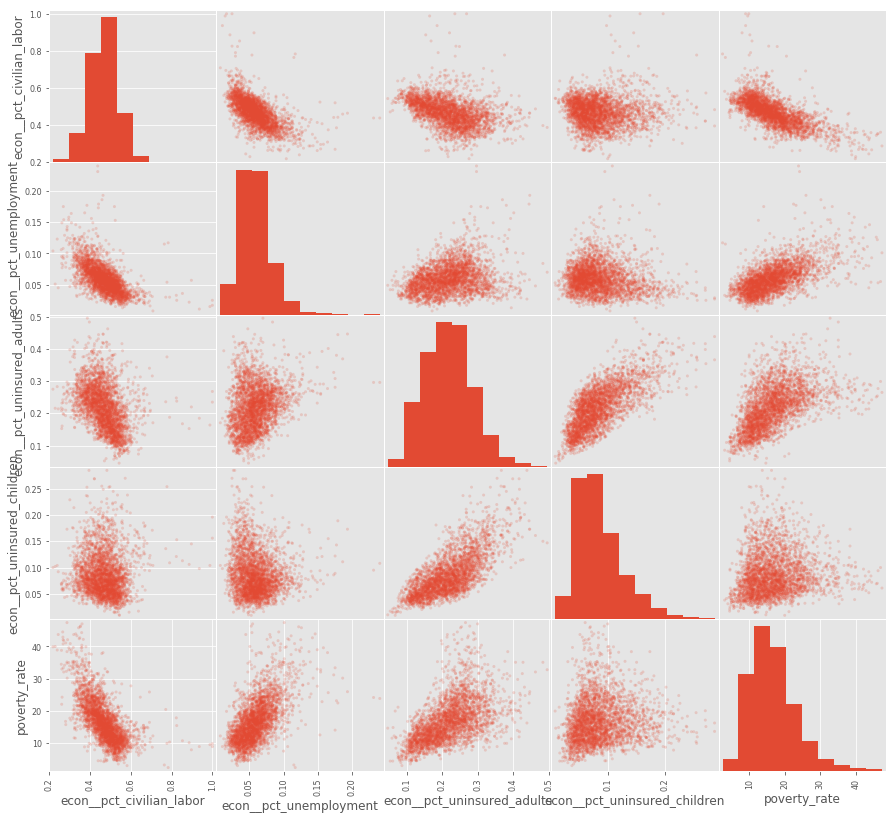

In [24]:
scatter_econ = scatter_matrix(poverty.loc[:, ['econ__pct_civilian_labor','econ__pct_unemployment'
                                              ,'econ__pct_uninsured_adults','econ__pct_uninsured_children'
                                              ,'poverty_rate']], alpha=0.2, figsize=(15, 14), diagonal='hist')

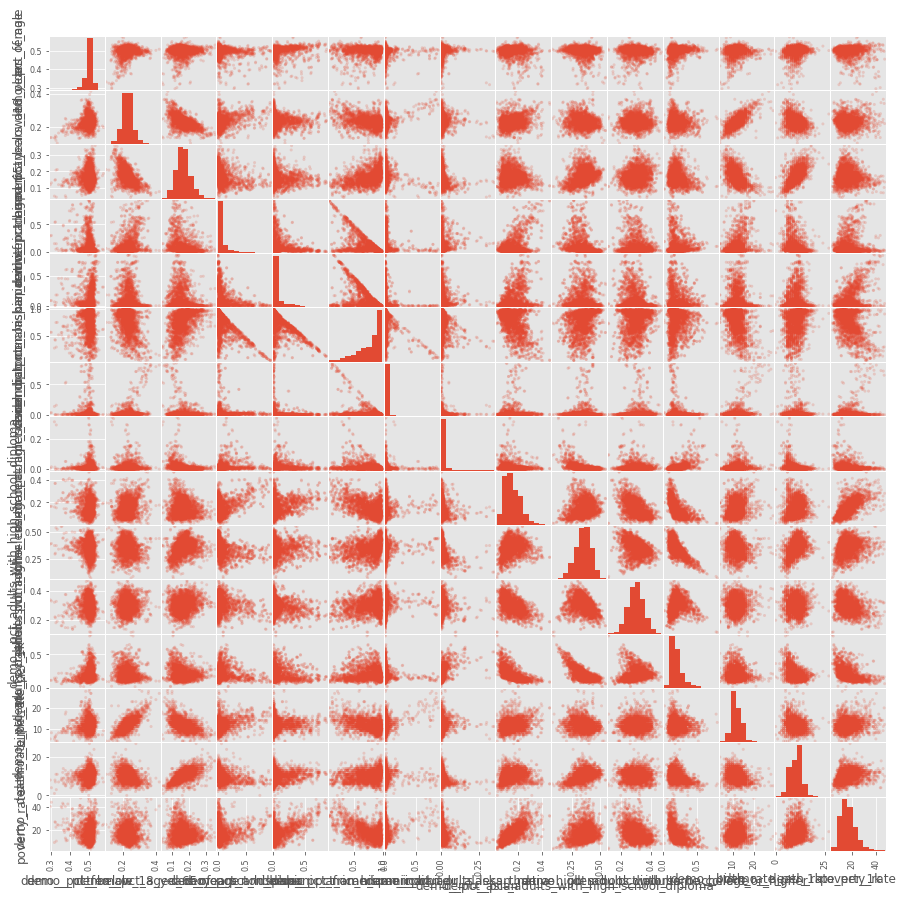

In [25]:
scatter_health = scatter_matrix(poverty.loc[:, ['demo__pct_female','demo__pct_below_18_years_of_age'
                                                , 'demo__pct_aged_65_years_and_older', 'demo__pct_hispanic'
                                                , 'demo__pct_non_hispanic_african_american','demo__pct_non_hispanic_white'
                                                , 'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian'
                                                , 'demo__pct_adults_less_than_a_high_school_diploma', 'demo__pct_adults_with_high_school_diploma'
                                                , 'demo__pct_adults_with_some_college', 'demo__pct_adults_bachelors_or_higher'
                                                , 'demo__birth_rate_per_1k', 'demo__death_rate_per_1k'
                                                , 'poverty_rate']], alpha=0.2, figsize=(15, 15), diagonal='hist')

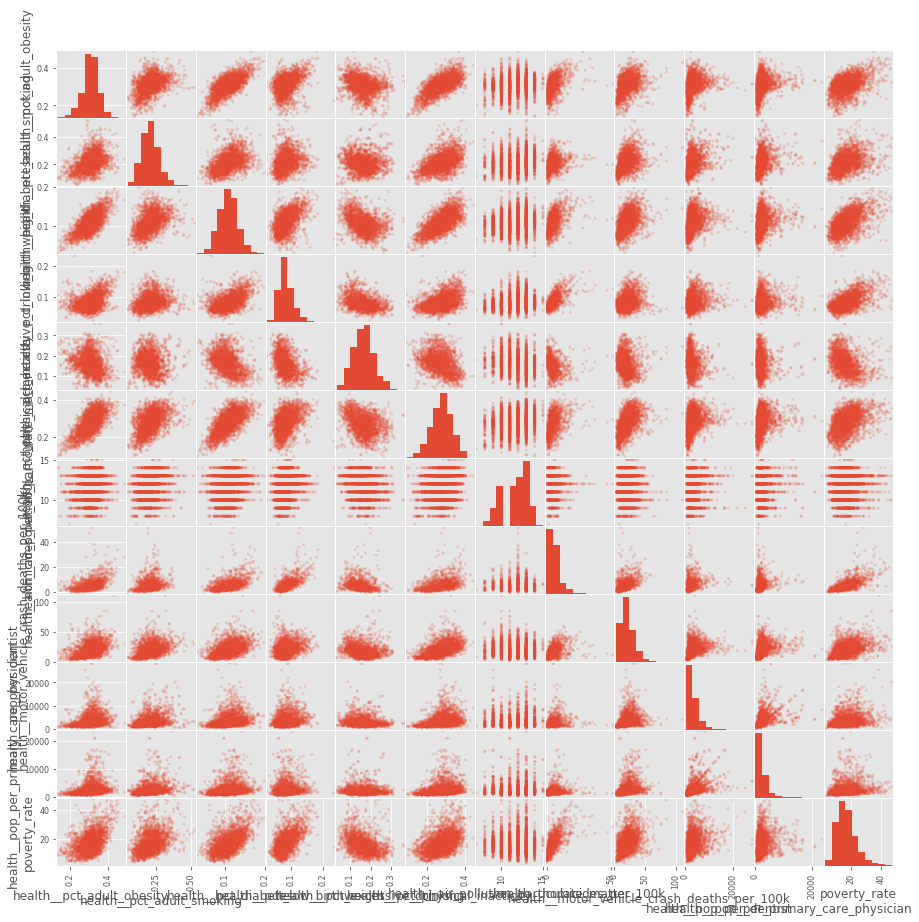

In [26]:
scatter_health = scatter_matrix(poverty.loc[:, ['health__pct_adult_obesity', 'health__pct_adult_smoking'
                                                ,'health__pct_diabetes', 'health__pct_low_birthweight'
                                                ,'health__pct_excessive_drinking','health__pct_physical_inacticity'
                                                ,'health__air_pollution_particulate_matter','health__homicides_per_100k'
                                                ,'health__motor_vehicle_crash_deaths_per_100k','health__pop_per_dentist'
                                                ,'health__pop_per_primary_care_physician','poverty_rate']]
                                , alpha=0.2, figsize=(15, 15), diagonal='hist')

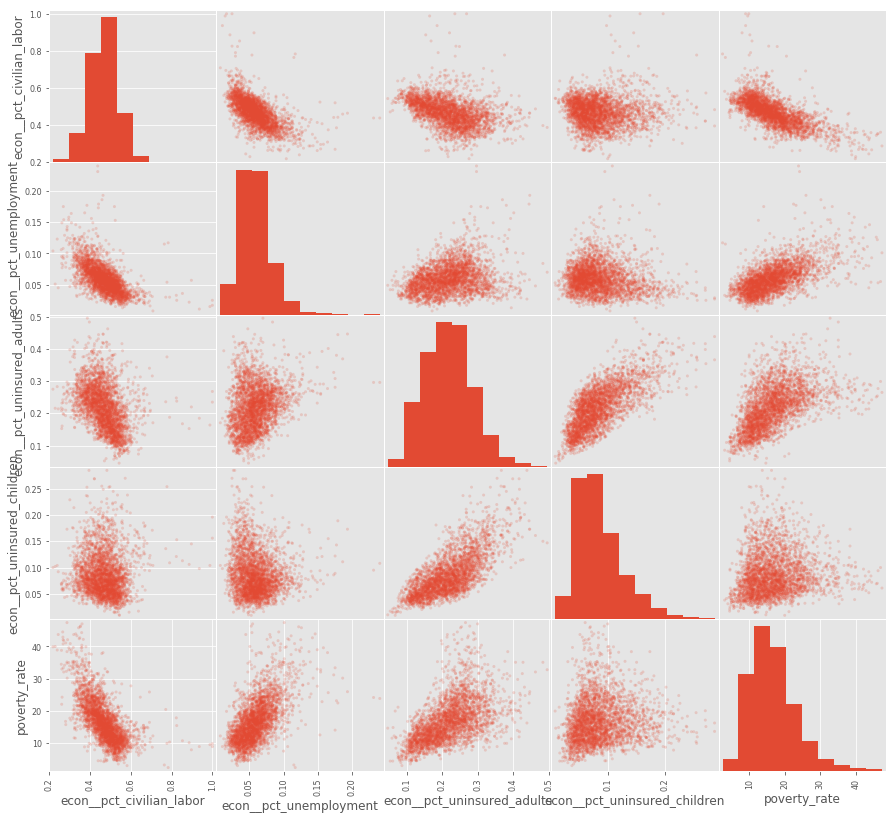

In [27]:
scatter_econ = scatter_matrix(poverty.loc[:, ['econ__pct_civilian_labor','econ__pct_unemployment','econ__pct_uninsured_adults','econ__pct_uninsured_children','poverty_rate']], alpha=0.2, figsize=(15, 14), diagonal='hist')

#### TODO Statistical Transforms!!!

#### Correlation matrix
Compute the correlation matrix. Identify features with highest positive and negative pearson correlation coefficient. 

The features that correlate most positevely with poverty_rate (> 0.5):
* demo__pct_non_hispanic_african_american             0.507048
* health__pct_diabetes                                0.537038
* econ__pct_uninsured_adults                          0.541712
* health__pct_low_birthweight                         0.565456
* econ__pct_unemployment                              0.592022
* health__homicides_per_100k                          0.621399
* demo__pct_adults_less_than_a_high_school_diploma    0.680360

The features that correlate most negatively with poverty_rate (< - 0.5):
* econ__pct_civilian_labor                           -0.670417

In [28]:
corr_m = poverty.corr()
corr_m.sort_values(by='poverty_rate').loc[:,'poverty_rate']

econ__pct_civilian_labor                           -0.670417
demo__pct_non_hispanic_white                       -0.499974
demo__pct_adults_bachelors_or_higher               -0.467134
demo__pct_adults_with_some_college                 -0.363875
health__pct_excessive_drinking                     -0.353254
demo__pct_asian                                    -0.163033
demo__pct_aged_65_years_and_older                  -0.088123
demo__pct_female                                   -0.068065
row_id                                             -0.010522
demo__pct_below_18_years_of_age                     0.039237
health__air_pollution_particulate_matter            0.058582
econ__pct_uninsured_children                        0.098882
demo__pct_hispanic                                  0.105574
demo__birth_rate_per_1k                             0.127506
health__pop_per_primary_care_physician              0.156942
demo__pct_adults_with_high_school_diploma           0.202928
demo__pct_american_india

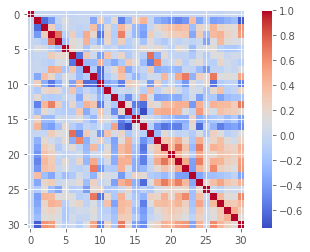

In [29]:
plt_corr = plt.imshow(poverty.corr(), cmap=plt.cm.coolwarm, interpolation='nearest')
plt_corr = plt.colorbar()

### TODO Outliers Analysis!

## Cleaning the Data
In this phase or stage we clean the data:
* drop features with low prediction value
* replace missing values
* scale features???

### Drop columns
We will start by dropping the columns or features with low prediction value. The features 'area__rucc', 'age_cat', 'area__urban_influence', 'econ__economic_typology' and 'rucc' are redundant with the new features 'age_rucc', 'aui' and 'eet' we created. The feature 'yr' does not hold value to predict poverty_rate???????.

In [30]:
poverty_clean = poverty.drop(columns=['area__rucc','age_cat','area__urban_influence'
                                ,'econ__economic_typology','rucc','yr'], axis=1)

In [31]:
poverty_clean.dtypes

row_id                                                int64
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school_diploma    float64
demo__pct_adults_with_high_school_diploma           float64
demo__pct_adults_with_some_college                  float64
demo__pct_adults_bachelors_or_higher    

### Replace Missing Values
The missing values are replaced by the respective median value of the feature or variable.

In [32]:
poverty_clean = poverty_clean.fillna(poverty_clean.median())
poverty_clean.shape

(3198, 34)

As we can see here under there are no missing values.

In [33]:
poverty_clean.isnull().sum()

row_id                                              0
econ__pct_civilian_labor                            0
econ__pct_unemployment                              0
econ__pct_uninsured_adults                          0
econ__pct_uninsured_children                        0
demo__pct_female                                    0
demo__pct_below_18_years_of_age                     0
demo__pct_aged_65_years_and_older                   0
demo__pct_hispanic                                  0
demo__pct_non_hispanic_african_american             0
demo__pct_non_hispanic_white                        0
demo__pct_american_indian_or_alaskan_native         0
demo__pct_asian                                     0
demo__pct_adults_less_than_a_high_school_diploma    0
demo__pct_adults_with_high_school_diploma           0
demo__pct_adults_with_some_college                  0
demo__pct_adults_bachelors_or_higher                0
demo__birth_rate_per_1k                             0
demo__death_rate_per_1k     

### TODO Scale Features!!!
Most of the quantitative features are already scaled between 0 and 1. However the following features are not:
* demo__birth_rate_per_1k
* demo__death_rate_per_1k
* health__air_pollution_particulate_matter
* health__homicides_per_100k
* health__motor_vehicle_crash_deaths_per_100k
* health__pop_per_dentist
* health__pop_per_primary_care_physician

This is why we apply the MinMaxScaler

In [34]:
poverty_scale = poverty_clean.loc[:,['demo__birth_rate_per_1k','demo__death_rate_per_1k'
                                    ,'health__air_pollution_particulate_matter','health__homicides_per_100k'
                                    ,'health__motor_vehicle_crash_deaths_per_100k','health__pop_per_dentist'
                                    ,'health__pop_per_primary_care_physician']]

poverty_scaled = pd.DataFrame(MinMaxScaler().fit_transform(poverty_scale), columns=poverty_scale.columns)

In [35]:
poverty_scaled.describe()

,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician
count,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,0.307079,0.381523,0.578721,0.109051,0.166098,0.109243,0.100066
std,0.109581,0.103190,0.192318,0.061427,0.091467,0.089143,0.087395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.296296,0.375000,0.100810,0.106790,0.055416,0.054855
50%,0.280000,0.370370,0.625000,0.100810,0.154061,0.084599,0.077980
75%,0.360000,0.444444,0.750000,0.100810,0.207060,0.127771,0.110293
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
poverty_clean.loc[:,'demo__birth_rate_per_1k'] = poverty_scaled.loc[:,'demo__birth_rate_per_1k']
poverty_clean.loc[:,'demo__death_rate_per_1k'] = poverty_scaled.loc[:,'demo__death_rate_per_1k']
poverty_clean.loc[:,'health__air_pollution_particulate_matter'] = poverty_scaled.loc[:,'health__air_pollution_particulate_matter']
poverty_clean.loc[:,'health__homicides_per_100k'] = poverty_scaled.loc[:,'health__homicides_per_100k']
poverty_clean.loc[:,'health__motor_vehicle_crash_deaths_per_100k'] = poverty_scaled.loc[:,'health__motor_vehicle_crash_deaths_per_100k']
poverty_clean.loc[:,'health__pop_per_dentist'] = poverty_scaled.loc[:,'health__pop_per_dentist']
poverty_clean.loc[:,'health__pop_per_primary_care_physician'] = poverty_scaled.loc[:,'health__pop_per_primary_care_physician']

### One Hot Encoding of Categorical Variables

In [37]:
#experiment with dummy_na=True
poverty_clean = pd.get_dummies(poverty_clean, columns=['age_rucc','aui','eet'])
poverty_clean.head()

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,poverty_rate,age_rucc_Old High Poverty,age_rucc_Old Low Poverty,age_rucc_Young High Poverty,age_rucc_Young Low Poverty,aui_High AUI,aui_Low AUI,aui_Medium AUI,eet_Federal/State,eet_Other EET,eet_Recreation/Farm
0,0,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,0.517,0.378,0.056,0.000,0.223896,0.345382,0.273092,0.157631,0.24,0.407407,0.345,0.219,0.159,0.154,0.164,0.317,0.625,0.187355,0.285581,0.183159,0.291241,22.6,1,0,0,0,0,0,1,1,0,0
1,2,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,0.016,0.954,0.002,0.018,0.113524,0.484699,0.235933,0.165844,0.32,0.407407,0.296,0.222,0.123,0.080,0.177,0.350,0.875,0.047995,0.192996,0.097913,0.067210,17.3,0,0,1,0,0,0,1,0,1,0
2,4,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,0.002,0.428,0.009,0.008,0.236346,0.309831,0.315789,0.138034,0.24,0.407407,0.267,0.211,0.092,0.079,0.164,0.259,0.375,0.100810,0.154061,0.012630,0.077980,24.4,0,1,0,0,1,0,0,1,0,0
3,5,0.578,0.049,0.231,0.107,0.474,0.194,0.196,0.031,0.002,0.916,0.043,0.002,0.091365,0.388554,0.349398,0.170683,0.12,0.481481,0.272,0.293,0.084,0.100,0.174,0.249,0.500,0.100810,0.186475,0.039259,0.041834,16.4,1,0,0,0,1,0,0,1,0,0
4,8,0.530,0.046,0.262,0.067,0.513,0.206,0.101,0.433,0.096,0.294,0.011,0.149,0.171598,0.266272,0.190335,0.371795,0.44,0.222222,0.232,0.165,0.080,0.086,0.178,0.253,0.500,0.073053,0.005496,0.048974,0.072423,17.4,0,0,0,1,0,1,0,0,1,0


In [38]:
poverty_clean.dtypes

row_id                                                int64
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school_diploma    float64
demo__pct_adults_with_high_school_diploma           float64
demo__pct_adults_with_some_college                  float64
demo__pct_adults_bachelors_or_higher    

In [39]:
poverty_clean.shape

(3198, 41)

## Model Building

In [40]:
rng = np.random.RandomState(0)

In [41]:
poverty_X = poverty_clean.drop(columns=['row_id','poverty_rate'], axis=1)
poverty_y = poverty_clean.poverty_rate

The regression models are scored using RMSE.

In [42]:
# use r2 adjusted in the future
scoring = {'r2':'r2','mse': make_scorer(mean_squared_error, greater_is_better=False)}

### Model Selection
We use nested cross validation to select the best model and score it.

In [43]:
inner_cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=rng)
outer_cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=rng)

In [44]:
cachedir = mkdtemp()
estimators = [('reg_model', LinearRegression())]
regr_pipe = Pipeline(estimators, memory=cachedir)

In [46]:
#limit depth tree
#max_depth=20, n_estimators=50, splitter='best'
#max_depth=15, n_estimators=100, splitter='best', loss='exponential' (my belief)
#max_depth=40, n_estimators=200, splitter='random', loss='linear' (computer)
adaReg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=15, splitter='random', criterion='mse'
                                                , min_samples_split=5, min_samples_leaf=11
                                                 , min_impurity_decrease=0.25)
                           , n_estimators=200, loss='linear', learning_rate=0.7, random_state=rng)

In [49]:
param_grid = dict(reg_model=[LinearRegression(), adaReg])

In [50]:
reg_grid = GridSearchCV(estimator=regr_pipe, param_grid=param_grid, scoring=scoring, cv=inner_cv
                        , error_score=0, refit='mse')
reg_pred = reg_grid.fit(poverty_X, poverty_y)
reg_pred.best_estimator_

Pipeline(memory='/var/folders/_j/vyb4dyfx2wq850vj9vh25wy40000gn/T/tmpjshz1743',
     steps=[('reg_model', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.25,
           min_impurity_split=None, min_samples_leaf=11,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='random'),
         learning_rate=0.7, loss='linear', n_estimators=200,
         random_state=<mtrand.RandomState object at 0x1a23db75a0>))])

In [51]:
train_scores = cross_validate(reg_grid, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

0.91202985448898299


2.7406956816445178

### Tune Hyper Parameters AdaBoost

In [63]:
ada_param ={'base_estimator__splitter' :   ['best', 'random']
            , 'base_estimator__max_depth' : [5, 10, 15, 20]
            , 'base_estimator__min_samples_split' : [2,5,10]
            , 'base_estimator__min_samples_leaf' : [3,5,11,23,51]
            , 'base_estimator__min_impurity_decrease' : [0.2,0.3,0.4,0.5,0.6]
            , 'n_estimators': [50, 100, 200, 300, 600]
            , 'learning_rate' : [0.1, 0.5, 1, 2, 5, 10]
            , 'loss' : ['linear', 'exponential']}

DTR = DecisionTreeRegressor(random_state = rng, criterion = 'mse', max_features = "auto")

ada = AdaBoostRegressor(base_estimator=DTR, n_estimators=50, random_state=rng)

In [ ]:
ada_grid = GridSearchCV(estimator=ada, param_grid=ada_param, scoring=scoring, cv=inner_cv
                        , error_score=0, refit='mse')
ada_pred = ada_grid.fit(poverty_X, poverty_y)
ada_pred.best_estimator_

In [ ]:
train_scores = cross_validate(ada_grid, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
np.average(np.sqrt(np.abs(train_scores['test_mse'])))

Here is the best adaboost regressor so far:

2.4749785352604574
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=40, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='random'),
         learning_rate=1.0, loss='linear', n_estimators=200,
         random_state=0)

### Feature Selection

In [53]:
caching = mkdtemp()

mse = make_scorer(mean_squared_error, greater_is_better=False)

rfecv = RFECV(estimator=adaReg, step=1, cv=inner_cv, scoring=mse)

rfecv.fit(poverty_X, poverty_y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 36


In [54]:
train_scores = cross_validate(rfecv, poverty_X, poverty_y, cv=outer_cv, scoring=scoring, return_train_score=True)
pprint(np.average(np.abs(train_scores['test_r2'])))
pprint(np.average(np.sqrt(np.abs(train_scores['test_mse']))))

0.91307523694643378
2.7347918781404261


In [55]:
[ranking for ranking in zip(rfecv.ranking_, poverty_X.columns)]

[(1, 'econ__pct_civilian_labor'),
 (1, 'econ__pct_unemployment'),
 (1, 'econ__pct_uninsured_adults'),
 (1, 'econ__pct_uninsured_children'),
 (1, 'demo__pct_female'),
 (1, 'demo__pct_below_18_years_of_age'),
 (1, 'demo__pct_aged_65_years_and_older'),
 (1, 'demo__pct_hispanic'),
 (1, 'demo__pct_non_hispanic_african_american'),
 (1, 'demo__pct_non_hispanic_white'),
 (1, 'demo__pct_american_indian_or_alaskan_native'),
 (1, 'demo__pct_asian'),
 (1, 'demo__pct_adults_less_than_a_high_school_diploma'),
 (1, 'demo__pct_adults_with_high_school_diploma'),
 (1, 'demo__pct_adults_with_some_college'),
 (1, 'demo__pct_adults_bachelors_or_higher'),
 (1, 'demo__birth_rate_per_1k'),
 (1, 'demo__death_rate_per_1k'),
 (1, 'health__pct_adult_obesity'),
 (1, 'health__pct_adult_smoking'),
 (1, 'health__pct_diabetes'),
 (1, 'health__pct_low_birthweight'),
 (1, 'health__pct_excessive_drinking'),
 (1, 'health__pct_physical_inacticity'),
 (1, 'health__air_pollution_particulate_matter'),
 (1, 'health__homicides_

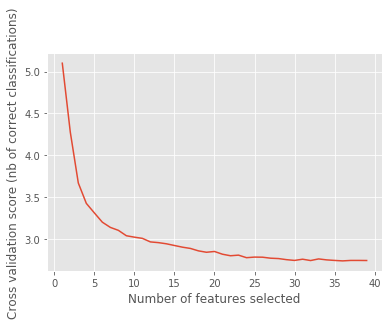

In [56]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), np.sqrt(np.abs(rfecv.grid_scores_)))
plt.show()

## TODO Analyze Residuals!!!

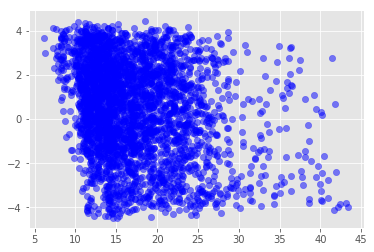

In [57]:
plt.scatter(rfecv.predict(poverty_X), rfecv.predict(poverty_X) - poverty_y, c='b', s=40, alpha=0.5)

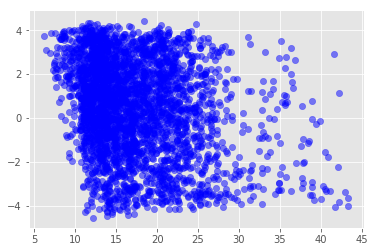

In [58]:
plt.scatter(reg_grid.predict(poverty_X), reg_grid.predict(poverty_X) - poverty_y, c='b', s=40, alpha=0.5)

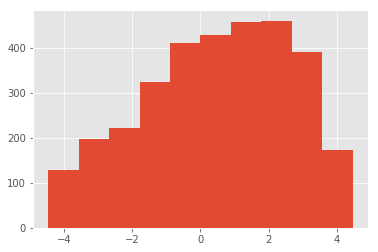

In [59]:
residuals = rfecv.predict(poverty_X) - poverty_y
residuals.hist()

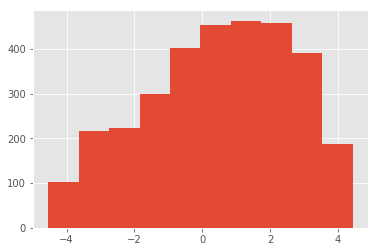

In [60]:
residuals = reg_grid.predict(poverty_X) - poverty_y
residuals.hist()

## Evaluation

In [201]:
poverty_test = pd.read_csv('./Microsoft_-_DAT102x_Predicting_Poverty_in_the_United_States_-_Test_values.csv')

In [202]:
poverty_test.shape

(3080, 34)

In [203]:
poverty_test.loc[poverty_test.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area','rucc'] = 'high poverty'
poverty_test.loc[poverty_test.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area','rucc'] ='high poverty'
poverty_test.loc[poverty_test.area__rucc == 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area','rucc'] = 'low poverty'
poverty_test.loc[poverty_test.area__rucc == 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area','rucc'] ='high poverty'
poverty_test.loc[poverty_test.area__rucc == 'Metro - Counties in metro areas of 1 million population or more','rucc'] = 'low poverty'
poverty_test.loc[poverty_test.area__rucc == 'Metro - Counties in metro areas of 250,000 to 1 million population','rucc'] = 'low poverty'
poverty_test.loc[poverty_test.area__rucc == 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area','rucc'] = 'high poverty'
poverty_test.loc[poverty_test.area__rucc == 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area','rucc'] = 'high poverty'
poverty_test.loc[poverty_test.area__rucc == 'Metro - Counties in metro areas of fewer than 250,000 population','rucc'] = 'low poverty'

In [204]:
poverty_test.loc[poverty_test.econ__economic_typology == 'Recreation','eet'] = 'low poverty'
poverty_test.loc[poverty_test.econ__economic_typology == 'Nonspecialized','eet'] = 'medium poverty'
poverty_test.loc[poverty_test.econ__economic_typology == 'Mining-dependent','eet'] = 'medium poverty'
poverty_test.loc[poverty_test.econ__economic_typology == 'Manufacturing-dependent','eet'] = 'medium poverty'
poverty_test.loc[poverty_test.econ__economic_typology == 'Federal/State government-dependent','eet'] = 'high poverty'
poverty_test.loc[poverty_test.econ__economic_typology == 'Farm-dependent','eet'] = 'low poverty'

In [205]:
poverty_test.loc[poverty_test.area__urban_influence == 'Noncore adjacent to a large metro area','aui'] = 'medium poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Micropolitan adjacent to a large metro area','aui'] = 'medium poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents','aui'] ='high poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Large-in a metro area with at least 1 million residents or more','aui'] = 'low poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Micropolitan not adjacent to a metro area','aui'] = 'medium poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents','aui'] = 'medium poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Noncore adjacent to a small metro with town of at least 2,500 residents','aui'] = 'high poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Small-in a metro area with fewer than 1 million residents','aui'] = 'medium poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents','aui'] = 'medium poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents','aui'] = 'medium poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents','aui'] = 'medium poverty'
poverty_test.loc[poverty_test.area__urban_influence == 'Micropolitan adjacent to a small metro area','aui'] = 'high poverty'

In [206]:
rucc_low = poverty_test.rucc == 'low poverty'
rucc_high = poverty_test.rucc == 'high poverty'

young_counties = poverty_test.demo__pct_aged_65_years_and_older < 0.167000
old_counties = poverty_test.demo__pct_aged_65_years_and_older > 0.167000

poverty_test.loc[young_counties,'age_cat'] = 'young'
poverty_test.loc[old_counties,'age_cat'] = 'old'

poverty_test.loc[young_counties & rucc_low,'age_rucc'] = 'young low poverty'
poverty_test.loc[young_counties & rucc_high,'age_rucc'] = 'young high poverty'
poverty_test.loc[old_counties & rucc_low,'age_rucc'] = 'old low poverty'
poverty_test.loc[old_counties & rucc_high,'age_rucc'] = 'old high poverty'

In [207]:
poverty_row_id = poverty_test.row_id
poverty_test = poverty_test.drop(columns=['row_id','area__rucc','age_cat','area__urban_influence'
                                          ,'econ__economic_typology','rucc','yr'], axis=1)

In [208]:
poverty_test_clean = poverty_test_dumm.fillna(poverty_test_dumm.median())
poverty_test_dumm = pd.get_dummies(poverty_test, columns=['age_rucc','aui','eet'])

In [209]:
poverty_test_scale = poverty_test_clean.loc[:,['demo__birth_rate_per_1k','demo__death_rate_per_1k'
                                    ,'health__air_pollution_particulate_matter','health__homicides_per_100k'
                                    ,'health__motor_vehicle_crash_deaths_per_100k','health__pop_per_dentist'
                                    ,'health__pop_per_primary_care_physician']]

poverty_test_scaled = pd.DataFrame(MinMaxScaler().fit_transform(poverty_test_scale), columns=poverty_test_scale.columns)

In [210]:
poverty_test_clean.loc[:,'demo__birth_rate_per_1k'] = poverty_test_scaled.loc[:,'demo__birth_rate_per_1k']
poverty_test_clean.loc[:,'demo__death_rate_per_1k'] = poverty_test_scaled.loc[:,'demo__death_rate_per_1k']
poverty_test_clean.loc[:,'health__air_pollution_particulate_matter'] = poverty_test_scaled.loc[:,'health__air_pollution_particulate_matter']
poverty_test_clean.loc[:,'health__homicides_per_100k'] = poverty_test_scaled.loc[:,'health__homicides_per_100k']
poverty_test_clean.loc[:,'health__motor_vehicle_crash_deaths_per_100k'] = poverty_test_scaled.loc[:,'health__motor_vehicle_crash_deaths_per_100k']
poverty_test_clean.loc[:,'health__pop_per_dentist'] = poverty_test_scaled.loc[:,'health__pop_per_dentist']
poverty_test_clean.loc[:,'health__pop_per_primary_care_physician'] = poverty_test_scaled.loc[:,'health__pop_per_primary_care_physician']

In [211]:
submission = pd.DataFrame(reg_grid.predict(poverty_test_clean))

In [212]:
poverty_submission = pd.concat([poverty_row_id, submission], axis=1)
poverty_submission = poverty_submission.rename(index=str, columns={0: 'poverty_rate'})
poverty_submission = poverty_submission.round({'poverty_rate':2})

In [213]:
poverty_submission.head()

,row_id,poverty_rate
0,1,18.12
1,3,16.90
2,6,14.20
3,7,26.50
4,14,14.70


In [214]:
poverty_submission.shape

(3080, 2)

In [215]:
poverty_submission.to_csv(path_or_buf='./MV_Poverty_Submission_AdaReg.csv', index=False)